In [1]:
import sys 
import os

sys.path.append('../../Datasets/MIT_RealityCommons_Badge/')

In [ ]:
# IR.csv is an interaction network
# Zigbee.csv is a proximity network between individuals and anchor nodes; this dataframe has 1M rows.
## What is RSSI in this case?

In [3]:
import pandas as pd
df = pd.read_csv('/Users/timothysudijono/projects/Research/Datasets/MIT_RealityCommons_Badge/IR.csv')
df.head()

,sender.id,local.id,date.time
0,13,106,2007-03-26 08:48:21
1,13,106,2007-03-26 08:48:28
2,13,106,2007-03-26 08:48:29
3,13,106,2007-03-26 08:48:31
4,13,106,2007-03-26 10:06:38


In [13]:
times = df['date.time'].astype('datetime64[h]')


0       2007-03-26 08:00:00
1       2007-03-26 08:00:00
2       2007-03-26 08:00:00
3       2007-03-26 08:00:00
4       2007-03-26 10:00:00
                ...        
34005   2007-04-17 13:00:00
34006   2007-04-17 15:00:00
34007   2007-04-17 15:00:00
34008   2007-04-17 16:00:00
34009   2007-04-17 18:00:00
Name: date.time, Length: 34010, dtype: datetime64[ns]

In [20]:
hours = [x.hour for x in times]

(array([3550., 2382., 2425., 3763., 2174., 1819., 2351., 7181., 4835.,
        3530.]),
 array([ 0. ,  2.3,  4.6,  6.9,  9.2, 11.5, 13.8, 16.1, 18.4, 20.7, 23. ]),
 <a list of 10 Patch objects>)

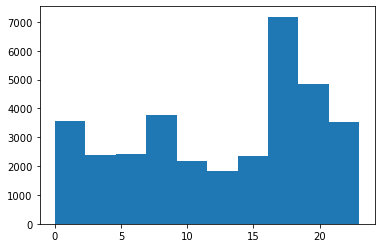

In [21]:
import matplotlib.pyplot as plt
plt.hist(hours)

In [24]:
df['hour'] = pd.Series(hours)
df.head(5)

,sender.id,local.id,date.time,hour
0,13,106,2007-03-26 08:48:21,8
1,13,106,2007-03-26 08:48:28,8
2,13,106,2007-03-26 08:48:29,8
3,13,106,2007-03-26 08:48:31,8
4,13,106,2007-03-26 10:06:38,10


## EDA, and data cleaning 

In [27]:
## reomve observations at night?
daytime_interactions = df.loc[(df.hour <= 20) & (df.hour >= 7),:]

In [29]:
daytime_interactions.head(10)

,sender.id,local.id,date.time,hour
0,13,106,2007-03-26 08:48:21,8
1,13,106,2007-03-26 08:48:28,8
2,13,106,2007-03-26 08:48:29,8
3,13,106,2007-03-26 08:48:31,8
4,13,106,2007-03-26 10:06:38,10
5,13,276,2007-03-26 10:08:09,10
6,0,106,2007-03-26 12:31:59,12
7,280,264,2007-03-26 13:24:29,13
8,280,264,2007-03-26 13:24:34,13
9,281,273,2007-03-26 13:29:32,13


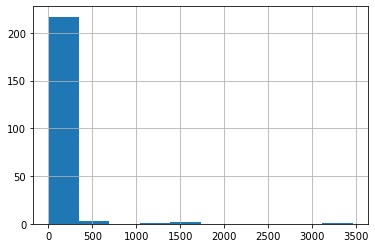

In [42]:
## Does binning provide enough observations?
date_hour = daytime_interactions['date.time'].astype('datetime64[h]')
counts = date_hour.groupby(date_hour).count()
counts.hist()

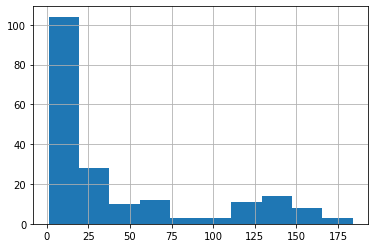

In [49]:
counts[counts < 200].hist()

## Create social interaction dynamic network

In [ ]:
# weight the edges by length of interaction.
# some of the itime intervals are not populated. Should we have no data here?

## Run pipeline


## Analyzing Zigbee data

In [30]:
zb = pd.read_csv('/Users/timothysudijono/projects/Research/Datasets/MIT_RealityCommons_Badge/Zigbee.csv')
zb.head()

,sender.id,local.id,RSSI,date.time
0,276,106,-27,2007-03-23 15:39:41
1,276,106,-20,2007-03-23 15:40:41
2,276,106,-12,2007-03-23 15:42:41
3,276,106,-1,2007-03-23 15:48:41
4,24,106,-29,2007-03-23 15:52:17


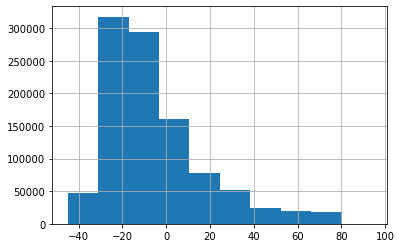

In [32]:
zb.RSSI.hist() 
# it's unclear what -20 RSSI means in terms of proximity... Can possibly use this as a graph distance measure?

In [50]:
times = zb['date.time'].astype('datetime64[h]')
hours = [x.hour for x in times]
zb['hour'] = pd.Series(hours)
daytime_zb = zb.loc[(zb.hour <= 21) & (zb.hour >= 6),:]

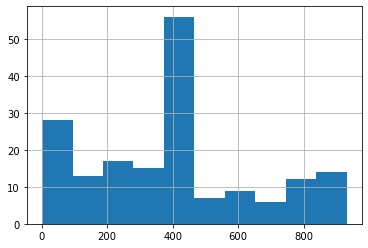

In [52]:
date_hour = zb['date.time'].astype('datetime64[h]')
counts = date_hour.groupby(date_hour).count()
counts[counts < 1000].hist()

In [ ]:
# For each hour, groupby sender id and local id, aggregating zigbee information into a distance measure.
# What do we do about the ordering of the receivers?